We are aiming to meta-analyze the following outcomes:

- ABC-Irritability
- ABC-Hyperactivity
- ABC-Social Withdrawal/Lethargy
- ABC-Inappropriate Speech
- ABC-Stereotypy
- CGI-Improvement

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
abc_data = (pd.read_excel('data/ASD_ABC data only_for MA_06062016.xlsx', 
                                    sheetname='ABC_data', 
                                    na_values=['ND','NR','NRNR'])
                     .replace({'Intervention_category':{'placebo':'Placebo'}}))

In [3]:
abc_data.head()

,REFID,Citation,Child Paper,Rx Grouping,Group_Desc,RX_Class,Intervention_category,Dose,Route,Rx_Durn,...,Change score_Q1,Change score_Q3,Change score Min,Change score Max,Change score 95% L,Change score 95% H,Other stats,Results,Comments,Comments_2
0,83,"R. L. Findling, R. Mankoski, K. Timko, K. Lear...",NaN,G1:,aripiprazole,antipsychotics,Medical,2 - 15mg/day,oral,16 weeks,...,NaN,NaN,NaN,NaN,NaN,NaN,diff=-5.2 (95%CI: -10.2 to -0.2),"G1 Vs G2, p=0.041",NaN,NaN
1,83,"R. L. Findling, R. Mankoski, K. Timko, K. Lear...",NaN,G2:,placebo,placebo,Placebo,NaN,oral,16 weeks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,83,"R. L. Findling, R. Mankoski, K. Timko, K. Lear...",NaN,G1:,aripiprazole,antipsychotics,Medical,2 - 15mg/day,oral,16 weeks,...,NaN,NaN,NaN,NaN,NaN,NaN,diff=-1.5 (95%CI: -2.6 to -0.3),"G1 Vs G2, p=0.013",NaN,NaN
3,83,"R. L. Findling, R. Mankoski, K. Timko, K. Lear...",NaN,G2:,placebo,placebo,Placebo,NaN,oral,16 weeks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83,"R. L. Findling, R. Mankoski, K. Timko, K. Lear...",NaN,G1:,aripiprazole,antipsychotics,Medical,2 - 15mg/day,oral,16 weeks,...,NaN,NaN,NaN,NaN,NaN,NaN,diff=-4.40 (95%CI: -8.82 to 0.02),"G1 Vs G2, p=0.051",NaN,NaN


In [4]:
abc_data.columns

Index(['REFID', 'Citation', 'Child Paper', 'Rx Grouping', 'Group_Desc',
       'RX_Class', 'Intervention_category', 'Dose', 'Route', 'Rx_Durn',
       'OUTC_Main_\nCATG', 'Outcome_Sub_category', 'Outc_Tool',
       'Outcome_specify', 'Outcome_MA', 'REPORTER_RATER',
       'Baseline sample size', 'BL_count', 'BL %', 'BL Mean', 'BL SD', 'BL SE',
       'BL_Median', 'BL_Q1', 'BL_Q3', 'BL Min', 'BL Max', 'BL 95% L',
       'BL 95% H', 'Assessment tmpt', 'sample_size', 'count', ' %', 'Mean',
       'SD', 'SE', 'Median', 'Q1', 'Q3', 'Min', 'Max', '95% L', '95% H',
       'FUP timepoint ', 'FUP_sample_size', 'FUP_count ', 'FUP _percent ',
       'FUP\n Mean', 'FUP \nSD', 'FUP \n SE', 'FUP \n Median', 'FUP\n _Q1',
       'FUP \n_Q3', 'FUP\n  Min', 'FUP \n Max', 'FUP \n 95% L', 'FUP \n 95% H',
       'Change score _Describe', 'Change score sample_size',
       'Change score_count', 'Change score %', 'Change score Mean',
       'Change score SD', 'Change score SE', 'Change score_\nMedian',
     

In [5]:
(abc_data[abc_data.Outc_Tool=='Aberrant Behavior Checklist']
             .groupby('REFID')
             .agg({'Baseline sample size' : np.sum, 
                   'sample_size' : np.sum,
                   'FUP_sample_size': np.sum,
                   'Change score sample_size': np.sum})).fillna(0).astype(int)

,sample_size,Baseline sample size,FUP_sample_size,Change score sample_size
REFID,,,,
7,200,250,0,180
87,155,200,0,0
107,0,570,0,570
351,480,480,0,0
515,0,135,0,125
204_805,0,476,0,395
4394_4421_4386_380,530,660,0,0
4398_4387,245,650,0,385
4412_4405_4400_4393_4396_4395_4391_4380_1483_412_1605_1745,505,505,0,0


In [6]:
abc_data.RX_Class.value_counts()

antipsychotics                      60
placebo                             51
stimulant                           23
nutritional supplement              15
risp_adjuncts                       10
risperidone + placebo               10
antipsychotics + parent training     5
placebo                              1
Name: RX_Class, dtype: int64

In [7]:
abc_data.Group_Desc.value_counts()

Placebo                            42
Methylphenidate                    23
Risperidone                        20
Omega-3 fatty acids                15
Aripiprazole                       15
risperidone                        10
aripiprazole                       10
placebo                            10
risperidone + placebo              10
risperidone +  N-acetylcysteine     5
risperidone                         5
Risperidone + Parent Training       5
risperidone + N-Acetylcysteine      5
Name: Group_Desc, dtype: int64

In [8]:
abc_data.Outcome_MA.value_counts()

Aberrent Behavior Checklist - Hyperactivity                 43
Aberrent Behavior Checklist - Irritability                  33
Aberrent Behavior Checklist - Inappropriate Speech          33
Aberrent Behavior Checklist - Social Withdrawal/Lethargy    33
Aberrent Behavior Checklist - Stereotypic Behavior          33
Name: Outcome_MA, dtype: int64

In [9]:
abc_data = abc_data.replace({'Group_Desc':{'placebo':'Placebo',
             'Placebo ':'Placebo',
             'Placebo (flexibly dosed study)':'Placebo',
             'Placebo-substitution':'Placebo',
             'Placebo (fixed-dose study)':'Placebo',
             'risperidone high dose':'Risperidone',
             'risperidone low dose':'Risperidone',
             'risperidone':'Risperidone',
             'aripiprazole':'Aripiprazole',
             'Aripiprazole 15 mg/kg':'Aripiprazole',
             'Risperidone ':'Risperidone',
             'risperidone':'Risperidone',
             'risperidone ':'Risperidone',
             'risperidone + N-Acetylcysteine':'Risperidone + N-Acetylcysteine',
             'risperidone +  N-acetylcysteine':'Risperidone + N-Acetylcysteine'},
                 'RX_Class':{'placebo ':'placebo'}})

In [10]:
abc_data[abc_data.RX_Class=='antipsychotics'].Group_Desc.value_counts()

Risperidone     35
Aripiprazole    25
Name: Group_Desc, dtype: int64

Extract columns and rows of interest

In [11]:
analysis_subset = ['REFID', 'Group_Desc', 'RX_Class', 'Intervention_category', 'Dose', 'Route', 'Rx_Durn',
       'Outcome_MA', 'Baseline sample size', 'BL Mean', 'BL SD', 
       'sample_size', 'Mean', 'SD', 
       'Change score sample_size', 'Change score Mean', 'Change score SD']

In [12]:
abc_outcomes = abc_data.Outcome_MA.value_counts().index.values[:-1]
abc_rows = abc_data.Outcome_MA.isin(abc_outcomes)
abc_subset = abc_data.loc[abc_rows, analysis_subset]

In [13]:
baseline_present = (abc_subset['BL Mean'].notnull() & abc_subset['BL SD'].notnull())
endpoint_present = (abc_subset['Mean'].notnull() & abc_subset['SD'].notnull())
change_present = (abc_subset['Change score Mean'].notnull() &  
                                               abc_subset['Change score SD'].notnull())
antipsych_subset = abc_subset[baseline_present & (endpoint_present | change_present) 
                             & abc_subset.Group_Desc.isin(['Placebo', 'Risperidone', 
                                              'Aripiprazole'])]

## Antipsychotics meta-analysis

In [14]:
antipsych_subset.columns

Index(['REFID', 'Group_Desc', 'RX_Class', 'Intervention_category', 'Dose',
       'Route', 'Rx_Durn', 'Outcome_MA', 'Baseline sample size', 'BL Mean',
       'BL SD', 'sample_size', 'Mean', 'SD', 'Change score sample_size',
       'Change score Mean', 'Change score SD'],
      dtype='object')

In [15]:
antipsych_subset.Outcome_MA.value_counts()

Aberrent Behavior Checklist - Hyperactivity                 17
Aberrent Behavior Checklist - Inappropriate Speech          15
Aberrent Behavior Checklist - Irritability                  15
Aberrent Behavior Checklist - Social Withdrawal/Lethargy    15
Name: Outcome_MA, dtype: int64

In [16]:
antipsych_subset.Group_Desc.value_counts()

Placebo         30
Risperidone     28
Aripiprazole     4
Name: Group_Desc, dtype: int64

Looks like only sufficient results for risperidone, so will focus on that.

In [17]:
antipsych_subset = antipsych_subset[antipsych_subset.Group_Desc!='Aripiprazole']

In [18]:
antipsych_subset.pivot_table(values='Baseline sample size', columns='Outcome_MA', index='Group_Desc', 
                      aggfunc='sum').fillna(0).astype(int)

Outcome_MA,Aberrent Behavior Checklist - Hyperactivity,Aberrent Behavior Checklist - Inappropriate Speech,Aberrent Behavior Checklist - Irritability,Aberrent Behavior Checklist - Social Withdrawal/Lethargy
Group_Desc,,,,
Placebo,353,222,221,222
Risperidone,253,254,249,254


In [19]:
antipsych_subset['treat'] = antipsych_subset.Group_Desc.replace({'Risperidone':1, 'Placebo':0})

(0, 50)

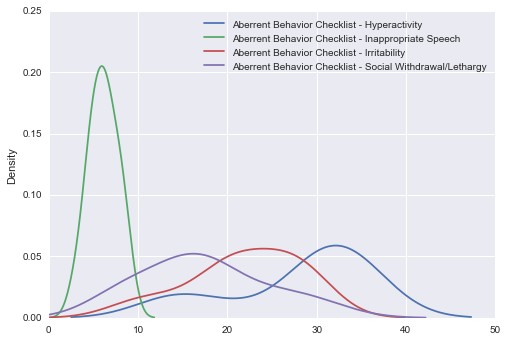

In [21]:
antipsych_subset.groupby('Outcome_MA')['BL Mean'].plot(kind='kde', legend=True)
plt.xlim(0, 50)

(0, 50)

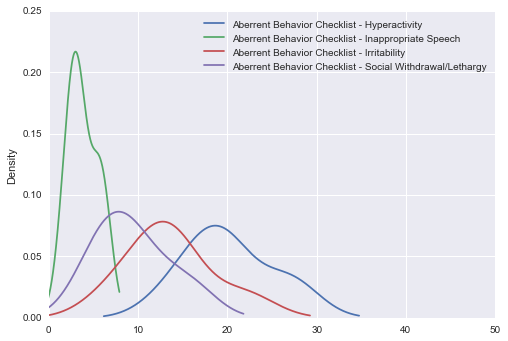

In [22]:
antipsych_subset.groupby('Outcome_MA')['Mean'].plot(kind='kde', legend=True)
plt.xlim(0, 50)

In [23]:
antipsych_subset[['REFID', 'Group_Desc']]

,REFID,Group_Desc
11,90,Risperidone
13,90,Risperidone
15,90,Risperidone
17,90,Risperidone
20,204_805,Risperidone
21,204_805,Risperidone
22,204_805,Placebo
23,204_805,Risperidone
24,204_805,Risperidone
25,204_805,Placebo


Restrict subset to studies that have placebo and risperidone arms

In [24]:
contains_both = (antipsych_subset.groupby('REFID')
                 .apply(lambda x: (x.Group_Desc=='Placebo').any() & (x.Group_Desc=='Risperidone').any()))

In [25]:
risp_placebo = antipsych_subset.REFID.unique()[contains_both]

In [26]:
antipsych_subset = antipsych_subset[antipsych_subset.REFID.isin(risp_placebo)]

In [37]:
antipsych_outcomes = antipsych_subset.Outcome_MA.unique()
antipsych_outcomes

array(['Aberrent Behavior Checklist - Hyperactivity',
       'Aberrent Behavior Checklist - Inappropriate Speech',
       'Aberrent Behavior Checklist - Irritability',
       'Aberrent Behavior Checklist - Social Withdrawal/Lethargy'], dtype=object)

In [34]:
n_outcomes = len(antipsych_outcomes)
unique_studies = antipsych_subset.REFID.unique()
n_studies = len(unique_studies)
n_studies

3

In [38]:
antipsych_subset['outcome'] = antipsych_subset.Outcome_MA.replace({'Aberrent Behavior Checklist - Hyperactivity':0,
                                    'Aberrent Behavior Checklist - Social Withdrawal/Lethargy':1,
                                    'Aberrent Behavior Checklist - Irritability':2,
                                    'Aberrent Behavior Checklist - Inappropriate Speech':3})

In [39]:
antipsych_subset['study_index'] = antipsych_subset.REFID.apply(lambda x: np.where(unique_studies==x)[0][0])

In [40]:
baseline_data = antipsych_subset[['study_index', 'treat', 'outcome', 'Baseline sample size', 'BL Mean', 'BL SD']].drop_duplicates()
baseline_data

,study_index,treat,outcome,Baseline sample size,BL Mean,BL SD
35,0,1,0,39,13.70,7.00
36,0,0,0,38,14.30,8.20
37,0,1,0,25,29.20,9.50
38,0,0,0,27,33.60,6.80
39,0,1,3,39,7.90,5.00
40,0,0,3,38,8.10,5.60
41,0,1,3,26,4.50,3.70
42,0,0,3,28,4.50,3.70
43,0,1,2,39,18.90,8.80
44,0,0,2,38,21.20,9.70


In [41]:
eot_data = antipsych_subset[['study_index', 'treat', 'outcome', 'sample_size', 'Mean', 'SD']].dropna()
eot_data

,study_index,treat,outcome,sample_size,Mean,SD
37,0,1,0,25.0,13.30,8.70
38,0,0,0,24.0,26.40,12.80
41,0,1,3,25.0,1.90,2.20
42,0,0,3,24.0,3.10,3.50
45,0,1,2,25.0,7.20,5.90
46,0,0,2,24.0,14.10,11.30
49,0,1,1,25.0,4.70,4.40
50,0,0,1,24.0,8.20,8.90
65,1,1,0,40.0,20.78,12.38
67,1,1,3,40.0,3.30,3.66


In [42]:
change_data = antipsych_subset[['study_index', 'treat', 'outcome', 'Change score sample_size',
       'Change score Mean', 'Change score SD']].dropna()
change_data

,study_index,treat,outcome,Change score sample_size,Change score Mean,Change score SD
35,0,1,0,39.0,-8.6,5.9
36,0,0,0,38.0,-5.7,6.9
39,0,1,3,39.0,-4.3,3.8
40,0,0,3,38.0,-2.4,4.0
43,0,1,2,39.0,-12.1,5.8
44,0,0,2,38.0,-6.5,8.4
47,0,1,1,39.0,-14.9,6.7
48,0,0,1,38.0,-7.4,9.7
96,2,0,0,28.0,-3.4,7.5
98,2,0,0,28.0,-1.0,10.0


In [69]:
def risperidone_model():
    
    # Means and covariances for outcome subscales
    μ = pm.Normal('μ', 0, 0.001, value=[0]*4)
    σ = pm.HalfCauchy('σ', 0, 5, value=[3]*4)
    ρ = pm.Uniform('ρ', -1, 1, value=[0]*6)
    @pm.deterministic
    def Τ(σ=σ, ρ=ρ):
        var = σ**2
        S = np.eye(4)*var
        S[0,1] = S[1,0] = σ[0]*σ[1]*ρ[0]
        S[0,2] = S[2,0] = σ[0]*σ[2]*ρ[1]
        S[0,3] = S[3,0] = σ[0]*σ[3]*ρ[2]
        S[2,1] = S[1,2] = σ[1]*σ[2]*ρ[3]
        S[3,1] = S[1,3] = σ[1]*σ[3]*ρ[4]
        S[2,3] = S[3,2] = σ[2]*σ[3]*ρ[5]
        return np.linalg.inv(S)

    # Model outcomes as multivariate normal (since they are subscales of the same outcome)
    m = [pm.MvNormal('m_{}'.format(i), μ, Τ) for i in range(len(unique_studies))]
    
    # Risperidone effect for each outcome
    β = pm.Normal('β', 0, 0.001, value=[0]*4)
    
    ν = pm.Exponential('ν', 1/30)
    
    # Baseline outcome likelihood
    @pm.deterministic
    def θ_baseline(m=m): 
        return [m[i][j] for i,j in zip(baseline_data.study_index.values, baseline_data.outcome.values)]
    
    baseline_se = baseline_data['BL SD'].values/np.sqrt(baseline_data['Baseline sample size'].values)
    
    baseline_outcome = pm.NoncentralT('baseline_outcome', θ_baseline, baseline_se**-2, nu=ν, observed=True, 
                                 value=baseline_data['BL Mean'].values)
    
    baseline_sim = pm.NoncentralT('baseline_sim', θ_baseline, baseline_se**-2, nu=ν, 
                                 value=baseline_data['BL Mean'].values)
    
    # End of treatment likelihood
    @pm.deterministic
    def θ_eot(m=m, β=β): 
        mi = [m[i][j] for i,j in zip(eot_data.study_index, eot_data.outcome)]
        return(mi + β[eot_data.outcome.values]*eot_data.treat.values)
    
    
    eot_se = eot_data['SD'].values/np.sqrt(eot_data['sample_size'].values)
    
    eot_outcome = pm.NoncentralT('eot_outcome', θ_eot, eot_se**-2, nu=ν, observed=True, 
                                 value=eot_data['Mean'].values)
    
    eot_sim = pm.NoncentralT('eot_sim', θ_eot, eot_se**-2, nu=ν, 
                                 value=eot_data['Mean'].values)
    
    # Change in score likelihood
    @pm.deterministic
    def θ_change(m=m, β=β, μ=μ): 
        mi = [m[i][j] for i,j in zip(change_data.study_index.values, change_data.outcome.values)]
        return(mi - μ[change_data.outcome.values] + β[change_data.outcome.values]*change_data.treat.values)
    
    
    change_se = change_data['Change score SD'].values/np.sqrt(change_data['Change score sample_size'].values)
    
    change_outcome = pm.NoncentralT('change_outcome', θ_change, change_se**-2, nu=ν, observed=True, 
                                 value=change_data['Change score Mean'].values)
    
    change_sim = pm.NoncentralT('change_sim', θ_change, change_se**-2, nu=ν, 
                                 value=change_data['Change score Mean'].values)

    return locals()

In [70]:
M = pm.MCMC(risperidone_model())

In [71]:
n_iterations = 50000
n_burn = 40000

In [72]:
M.sample(50000, burn=40000)
M.sample(50000, burn=40000)

 [-----------------100%-----------------] 50000 of 50000 complete in 128.7 sec

Estimates of risperidone effect

In [73]:
outcome_labels = ['Hyperactivity', 'Social Withdrawal/Lethargy', 'Irritability', 'Inappropriate Speech']

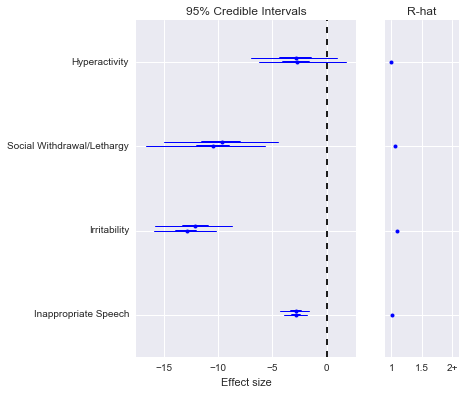

In [74]:
pm.Matplot.summary_plot(M.β, custom_labels=outcome_labels, xlab='Effect size')

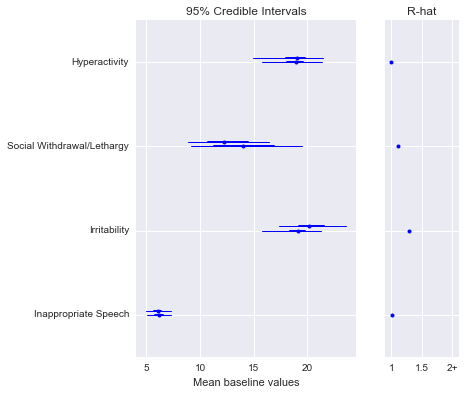

In [75]:
pm.Matplot.summary_plot(M.μ, custom_labels=outcome_labels, xlab='Mean baseline values')

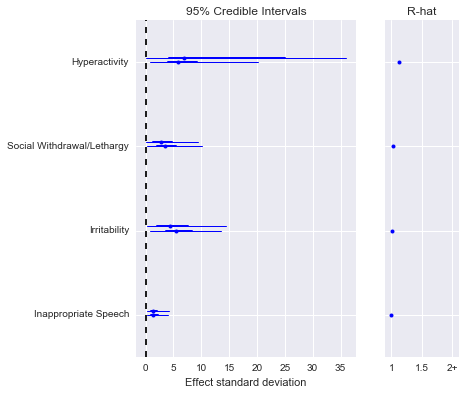

In [76]:
pm.Matplot.summary_plot(M.σ, custom_labels=outcome_labels, xlab='Effect standard deviation')

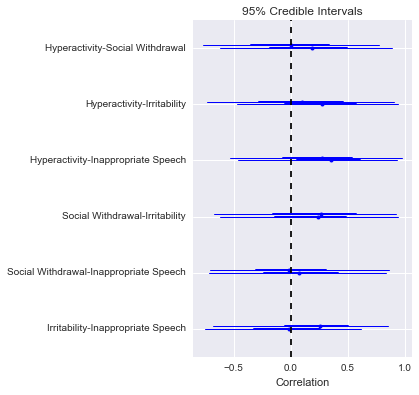

In [77]:
pm.Matplot.summary_plot(M.ρ, custom_labels=['Hyperactivity-Social Withdrawal',
                                           'Hyperactivity-Irritability',
                                           'Hyperactivity-Inappropriate Speech',
                                           'Social Withdrawal-Irritability',
                                           'Social Withdrawal-Inappropriate Speech',
                                           'Irritability-Inappropriate Speech'], xlab='Correlation', rhat=False)

Degrees of freedom parameter for t-distribution

Plotting ν


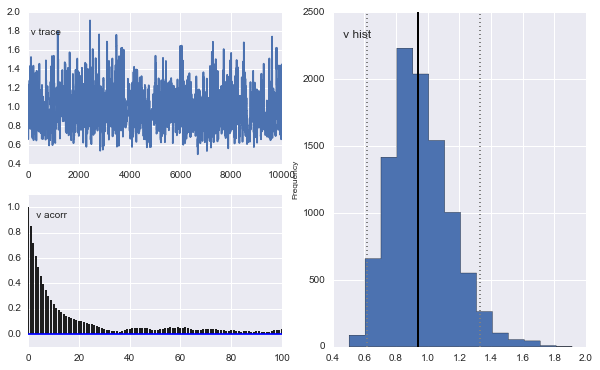

In [79]:
pm.Matplot.plot(M.ν)

## Model checking

Posterior predictive checks

In [81]:
# pm.Matplot.gof_plot(M.baseline_sim.trace(), baseline_data['BL Mean'].values, verbose=0)

In [54]:
# pm.Matplot.gof_plot(M.eot_sim.trace(), eot_data['Mean'].values, verbose=0)

In [55]:
# pm.Matplot.gof_plot(M.change_sim.trace(), change_data['Change score Mean'].values, verbose=0)